In [71]:
import os
import time
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By



In [72]:
product = "anouk kurta"
# define the path to chrome webdriver executable

# Initialize the Chrome Webdriver

driver = webdriver.Chrome()

# Navigate to Url
driver.get("https://www.myntra.com/kurta?rawQuery="+product)

# once the page is loaded, you can extract the page text

myntra_text = driver.page_source

myntra_html = bs(myntra_text, "html.parser")

In [73]:
pclass = myntra_html.find_all("ul",{"class" : "results-base"})

In [74]:
pclass[0]

<ul class="results-base"><li class="product-base" id="30104320"><div class="product-thumbShim"></div><div class="product-ratingsContainer"><span>4.3</span><span class="myntraweb-sprite product-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="product-ratingsCount"><div class="product-separator">|</div><!-- react-text: 335 -->2.5k<!-- /react-text --></div></div><a data-refreshpage="true" href="kurtas/anouk/anouk-maroon-ethnic-motifs-embroidered-round-neck-thread-work-straight-kurta/30104320/buy" style="display: block;" target="_blank"><div class="product-imageSliderContainer"><div class="product-sliderContainer" style="display: block;"><div style="background: rgb(255, 242, 223);"><div style="height: 280px; width: 100%;"><picture class="img-responsive" draggable="false" style="width: 100%; height: 100%; display: block;"><source srcset="
    https://assets.myntassets.com/f_webp,dpr_1.0,q_60,w_210,c_limit,fl_progressive/assets/images/3010432

In [75]:
for i in pclass:
    href = i.find_all('a', href=True)
    t=(href[0]['href'])

productLink = "http://www.myntra.com/"+t

productLink

'http://www.myntra.com/kurtas/anouk/anouk-maroon-ethnic-motifs-embroidered-round-neck-thread-work-straight-kurta/30104320/buy'

In [76]:
driver.get(productLink)
proRes = driver.page_source 

<html lang="en"><head><style data-vjs-version="7.21.4" id="bc-style-vjs" type="text/css">@charset "UTF-8";.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.video-js .vjs-modal-dialog,.vjs-button>.vjs-icon-placeholder:before,.vjs-modal-dialog .vjs-modal-dialog-content{position:absolute;top:0;left:0;width:100%;height:100%}.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.vjs-button>.vjs-icon-placeholder:before{text-align:center}@font-face{font-family:VideoJS;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAABDkAAsAAAAAG6gAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABHU1VCAAABCAAAADsAAABUIIslek9TLzIAAAFEAAAAPgAAAFZRiV3hY21hcAAAAYQAAADaAAADPv749/pnbHlmAAACYAAAC3AAABHQZg6OcWhlYWQAAA3QAAAAKwAAADYZw251aGhlYQAADfwAAAAdAAAAJA+RCLFobXR4AAAOHAAAABMAAACM744AAGxvY2EAAA4wAAAASAAAAEhF6kqubWF4cAAADngAAAAfAAAAIAE0AIFuYW1lAAAOmAAAASUAAAIK1cf1oHBvc3QAAA/AAAABJAAAAdPExYuNeJxjYGRgYOBiMGCwY2BycfMJYeDLSSzJY5BiYGGAAJA8MpsxJzM9kYEDxgPKsYBpDiBmg4gCACY7BUgAeJxjYGS7wTiBgZWBgaWQ5RkDA8MvC
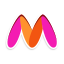

In [77]:
proRes_html = bs(proRes,"html.parser")
proRes_html

In [78]:
title_h = proRes_html.findAll("title")

In [79]:
title_h

[<title>Buy Anouk Maroon Ethnic Motifs Embroidered Round Neck Thread Work Straight Kurta  - Kurtas for Women 30104320 | Myntra</title>]

In [80]:
title = title_h[0].text

In [81]:
title

'Buy Anouk Maroon Ethnic Motifs Embroidered Round Neck Thread Work Straight Kurta  - Kurtas for Women 30104320 | Myntra'

In [82]:
overallrating = proRes_html.findAll("div",{"class" : "index-overallRating"})
overallrating
for i in overallrating:
    rating_value = i.find("div").text
print(rating_value)


4.3


In [83]:
price = proRes_html.findAll("span",{"class":"pdp-price"})
for i in price:
    price_vlaue = i.text
print(price_vlaue)

₹874


In [84]:
review = proRes_html.find("a",{"class" : "detailed-reviews-allReviews"})
review

<a class="detailed-reviews-allReviews" data-refreshpage="true" href="/reviews/30104320"><!-- react-text: 568 -->View all <!-- /react-text --><!-- react-text: 569 -->391<!-- /react-text --><!-- react-text: 570 --> reviews<!-- /react-text --></a>

In [85]:
t2 = review["href"]
review_link = "https://www.myntra.com"+t2
review_link

'https://www.myntra.com/reviews/30104320'

In [86]:
driver.get(review_link)
review_page = driver.page_source

In [87]:
#driver.quit()

In [88]:
review_html = bs(review_page, "html.parser")

In [91]:
review = review_html.find_all("div", {"class" : "detailed-reviews-userReviewsContainer"})
review

[<div class="detailed-reviews-userReviewsContainer" id="detailedReviewsContainer"><div class="user-review-userReviewWrapper"><div class="user-review-main user-review-showRating"><div class="user-review-starWrapper"><span class="user-review-starRating user-review-fiveStars"><!-- react-text: 180 -->5<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.001c-.553 0-.687.324-.306.716L3.276 7.56l-.766 3.455c-.12.544.165.742.623.45L6 9.645z" fill="#FFF" fill-rule="evenodd"></path></svg></span></span></div><div class="user-review-reviewTextWrapper">I am incredibly impressed! The fabric is unbelievably soft and breathable, perfect for a hot summer day. The fit is also spot on; it's true to size and drapes beautifully. I've worn it multiple times and i

In [102]:
for i in review:
    user_rating=i.findAll("div", {"class" : "user-review-main user-review-showRating"})
    user_commet=i.findAll("div", {"class" : "user-review-reviewTextWrapper"})
    user_name=i.findAll("div", {"class" : "user-review-left"})

In [103]:
user_rating
user_commet
user_name

[<div class="user-review-left"><span>Mudita Malviya</span><span>15 Apr 2025</span></div>,
 <div class="user-review-left"><span>Sriparna</span><span>20 Sept 2025</span></div>,
 <div class="user-review-left"><span>Dr Sarika Jain</span><span>15 June 2025</span></div>,
 <div class="user-review-left"><span>Divya Kumari</span><span>8 May 2025</span></div>,
 <div class="user-review-left"><span>Simranjit Kaur</span><span>30 Sept 2024</span></div>,
 <div class="user-review-left"><span>Pri Fab</span><span>2 June 2025</span></div>,
 <div class="user-review-left"><span>Ananya Deb</span><span>20 Nov 2024</span></div>,
 <div class="user-review-left"><span>Sonali Das</span><span>8 May 2025</span></div>,
 <div class="user-review-left"><span>Chandra Shekhar Singh</span><span>3 Sept 2025</span></div>,
 <div class="user-review-left"><span>Srujanee</span><span>14 June 2025</span></div>,
 <div class="user-review-left"><span>Sambhavi Singh</span><span>25 Apr 2025</span></div>,
 <div class="user-review-left"

In [109]:
for i in range(len(user_rating)):
    rating = user_rating[i].find("span",{"class":"user-review-starRating"}).get_text().strip()
    comment = user_commet[i].text
    name = user_name[i].find("span").text
    date = user_name[i].find_all("span")[1].text
    print(f"Date:{date}, Name:{name}, Rating:{rating}, Comment:{comment}")

Date:15 Apr 2025, Name:Mudita Malviya, Rating:5, Comment:I am incredibly impressed! The fabric is unbelievably soft and breathable, perfect for a hot summer day. The fit is also spot on; it's true to size and drapes beautifully. I've worn it multiple times and it still looks great, even after washing. The only minor thing I noticed is the neckline seems to stretch slightly over time, but overall, I highly recommend this shirt. The quality and comfort make it worth the price
Date:20 Sept 2025, Name:Sriparna, Rating:5, Comment:I was looking for a chikankari embroidered kurti for a long time but not that typical design. I found this kurta from Anouk is a must love the color and the design and the fit for sure 👌
Date:15 June 2025, Name:Dr Sarika Jain, Rating:5, Comment:
"The quality and price of this kurta make it a fantastic value."


If you'd like to emphasize the value even more, you could say:

1. "This kurta is an absolute steal at this price!"
2. "I'd say this kurta is worth every pe